8
b'Molecular Dynamics Project\n8\n10\n'
b''
16
b'Molecular Dynamics Project\n16\n10\n'
b''
[1.1953368186950684, 4.116282224655151]
[ 8 16]


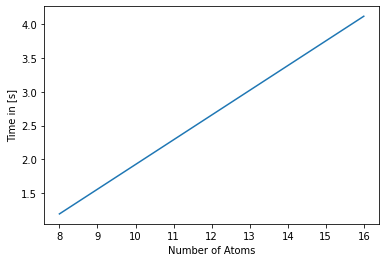

In [41]:
#imports
import matplotlib.pyplot as plt
import numpy as np
from subprocess import Popen,PIPE
import time

#
programbasePath = "/home/cm/CLionProjects/MoleDymCode/cmake-build-debug/"
programName = "myproject"
programCall = programbasePath + programName
#
atomcount = (np.arange(16) +1)*8
times = []
relaxationTime = 10.0 #low so it does not explode
#
def functionCaller(nbAtoms):
    '''this function should help with the computational complexy of the function
    and just calls it with different numbers of atoms and then safes a graph
    '''
    #
    start = time.time()
    print(nbAtoms)
    #calls time to call is just overhead that ocurrs always
    #was run with time and in python (33.169 vs 33.246 for 48 atoms) for me the offset is aceptable
    process = Popen([programCall,str(nbAtoms),str(relaxationTime)],stdout = PIPE, stderr= PIPE)
    Popen.wait(process)
    end = time.time()
    stdout, stderr = process.communicate()
    print(stdout)
    print(stderr)
    #print(end-start)
    return end -start

#run a bunch of times
for i in atomcount:
    times.append(functionCaller(i))

#plot
print(times)
print(atomcount)
plt.plot(atomcount,times)
plt.xlabel("Number of Atoms")
plt.ylabel("Time in [s]")
plt.savefig('plotAtomTimes.png')
plt.show()